<a href="https://colab.research.google.com/github/Euno257/VTU_ML_LAB/blob/main/prog10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

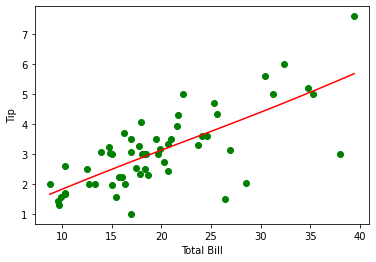

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
  url='https://raw.githubusercontent.com/devxpy/ml_lab/master/p10.csv'

  df=pd.read_csv(url)
  X=df.total_bill.values
  y=df.tip.values

  sort_idx=X.argsort()
  X=X[sort_idx]
  y=y[sort_idx]
  ypred=local_weight_regression(X,y,10)

  plt.scatter(X,y,c="green")
  plt.plot(X,ypred,c="red")
  plt.xlabel("Total Bill")
  plt.ylabel("Tip")
  plt.show()

def local_weight_regression(X,y,k):
  X=np.array([np.ones(len(X)),X]).T
  return np.array([x @ local_weight(x,X,y,k) for x in X])

def local_weight(x,X,y,k):
  weights=kernel(x,X,k)
  W=np.linalg.inv(X.T @ (weights @ X)) @ (X.T @ (weights @ y))
  return W

def kernel(x,X,k):
  weights=np.eye(len(X))
  for i in range(len(X)):
    d=x-X[i]
    weights[i,i]=np.exp(d @ d.T/(-2 * k ** 2))
  return weights

main()
